# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

In [26]:
ais = pd.read_csv('../data/ais.csv')
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

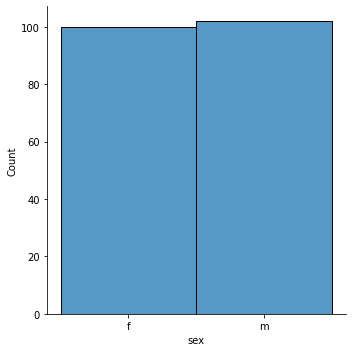

In [4]:
sns.displot(data = ais["sex"]);

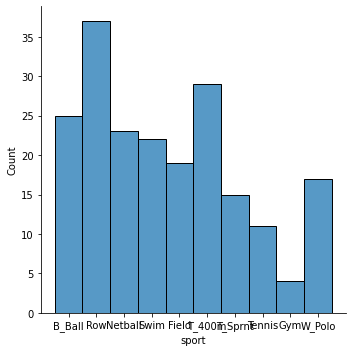

In [5]:
sns.displot(data = ais["sport"]);

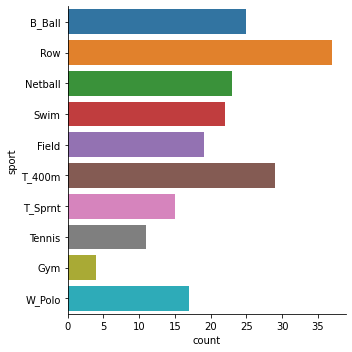

In [8]:
sns.catplot(data = ais,kind = "count",y = "sport")

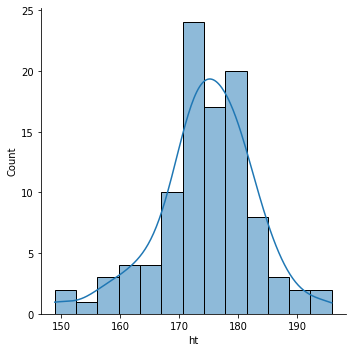

In [24]:
sns.displot(data = ais[ais.sex == "f"].ht, kde=True)


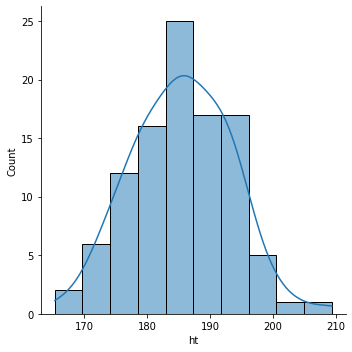

In [25]:
sns.displot(data = ais[ais.sex == "m"].ht,kde = True)


Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [97]:
print("Selection 1 ********************************")
female = ais[(ais.sex == "f") & (ais.sport == "Row")]
print(f"female: { female.id.count()}")
male = ais[(ais.sex == "m") & (ais.sport == "Row")]
print(f"Male: { male.id.count()}")
print("mode: " + ais[ais.sport == "Row"].mode()["sex"][0])

print("Selection 2 ********************************")
female = (ais.sex == "f")
fdf = ais[female]
femalesports = fdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
print(f"female: { femalesports.id.count()}")

male = (ais.sex == "m")
mdf = ais[male]
malesports = mdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
print(f"female: { malesports.id.count()}")
print("mode: " + ais[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")].mode()["sex"][0])



Selection 1 ********************************
female: 22
Male: 15
mode: f
Selection 2 ********************************
female: 52
female: 19
mode: f


C:\Users\szymo\AppData\Local\Temp\ipykernel_19772\4172599024.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femalesports = fdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
C:\Users\szymo\AppData\Local\Temp\ipykernel_19772\4172599024.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  malesports = mdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]


In [57]:
print("Selection 1 ********************************")
rowers = ais[ais.sport == "Row"].ht
print(f"Mean:                {rowers.mean()}")
print(f"Standard deviation:  {rowers.std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {rowers.var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {rowers.skew()}")
print(f"Kurtosis:            {rowers.kurtosis()}")
print(f"Minimum:   {rowers.min()}")
print(f"Median:    {rowers.median()}")
print(f"Maximum:   {rowers.max()}")

print('Selection 2 ***********************************************************')
sports = ais[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")].ht
print(f"Mean:                {sports.mean()}")
print(f"Standard deviation:  {sports.std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {sports.var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {sports.skew()}")
print(f"Kurtosis:            {sports.kurtosis()}")
print(f"Minimum:   {sports.min()}")
print(f"Median:    {sports.median()}")
print(f"Maximum:   {sports.max()}")

print('Selection 3 ***********************************************************')

mask  = (ais.sex == "f")
new = ais[mask]
female = new[(ais.sport == "Row") | (ais.sport == "B_Ball")].ht
print(f"Mean:                {female.mean()}")
print(f"Standard deviation:  {female.std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {female.var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {female.skew()}")
print(f"Kurtosis:            {female.kurtosis()}")
print(f"Minimum:   {female.min()}")
print(f"Median:    {female.median()}")
print(f"Maximum:   {female.max()}")





Selection 1 ********************************
Mean:                182.3756756756757
Standard deviation:  7.798376091832815
Variance:            60.81466966966965
Skewness:            -0.9519631183854053
Kurtosis:            2.9203632716558277
Minimum:   156.0
Median:    181.8
Maximum:   198.0
Selection 2 ***********************************************************
Mean:                179.0661971830986
Standard deviation:  7.936370952987299
Variance:            62.98598390342053
Skewness:            -0.3486616428809658
Kurtosis:            0.8305138548642468
Minimum:   156.0
Median:    179.5
Maximum:   198.0
Selection 3 ***********************************************************
Mean:                180.1257142857143
Standard deviation:  7.144077878879525
Variance:            51.03784873949577
Skewness:            -0.7104900674717266
Kurtosis:            3.1361094612264235
Minimum:   156.0
Median:    179.7
Maximum:   195.9


C:\Users\szymo\AppData\Local\Temp\ipykernel_19772\1425887772.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female = new[(ais.sport == "Row") | (ais.sport == "B_Ball")].ht


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |